In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

In [2]:
#Downloading the IMDB dataset
from keras.datasets import imdb
(training_data, training_targets),(testing_data, testing_targets)=imdb.load_data(num_words=10000)
data=np.concatenate((training_data, testing_data),axis=0)
targets=np.concatenate((training_targets, testing_targets), axis=0)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
#explore the data
print("categories:",np.unique(targets))
print("number of unique words:",len(np.unique(np.hstack(data))))

categories: [0 1]
number of unique words: 9998


In [4]:
length=[len(i) for i in data]
print("Average review length:", np.mean(length))
print("Standard deviation:", round(np.std(length)))

Average review length: 234.75892
Standard deviation: 173


In [5]:
#single training example
print("Label:",targets[0])

Label: 1


In [6]:
print(data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [7]:
#retriveing dictioary mapping word indices back into original words
index=imdb.get_word_index()
reverse_index=dict([(value, key) for (key, value)in index.items()])
decoded= " ".join([reverse_index.get(i-3, "#") for i in data[0]])
print(decoded)

1641221/1641221 [==============================] - 0s 0us/step
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [8]:
#data preparation
def vectorize(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

data=vectorize(data)
targets=np.array(targets).astype("float32")

In [9]:
#splitting data
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

In [10]:
#Building and training the model
model = models.Sequential()
#input layer
model.add(layers.Dense(50, activation = "relu",input_shape=(10000,)))
#Hidden Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50,activation= "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation= "relu"))
#Output Layers
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

In [11]:
#compile the code
model.compile(
optimizer = "adam",
loss = "binary_crossentropy",
metrics = ["accuracy"]
)

In [15]:
#Batch size and epoch
results = model.fit(
train_x, train_y,
epochs =2,
batch_size = 500,
validation_data = (test_x, test_y)
)

Epoch 1/2
80/80 [==============================] - 3s 38ms/step - loss: 0.0358 - accuracy: 0.9879 - val_loss: 0.5452 - val_accuracy: 0.8771
Epoch 2/2
80/80 [==============================] - 2s 30ms/step - loss: 0.0304 - accuracy: 0.9898 - val_loss: 0.6054 - val_accuracy: 0.8812


In [13]:
#Evaluate the model
print(np.mean(results.history["val_accuracy"]))

0.8962000012397766


In [18]:
score = model.evaluate(test_x, test_y, batch_size=500)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20/20 [==============================] - 0s 21ms/step - loss: 0.6054 - accuracy: 0.8812
Test loss: 0.6053597927093506
Test accuracy: 0.8812000155448914


In [19]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


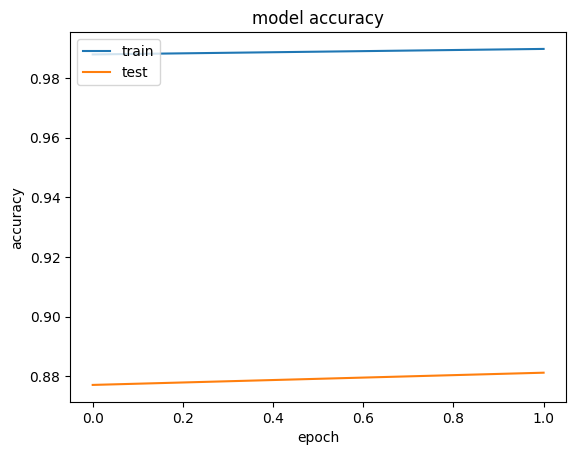

In [20]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

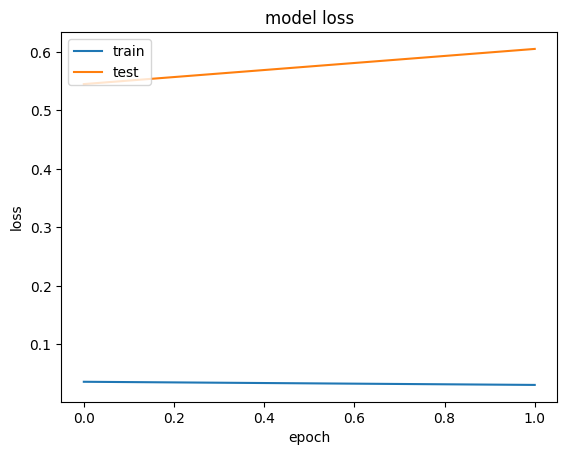

In [21]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
